In [12]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 72.9 MB/s  0:00:00m0:00:0100:01


In [4]:
!pip install matplotlib

In [33]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
with open("chatcontroldenmarkquery.json", "r") as file:
    data = json.load(file)
    data = data["data"]
    data = data["children"]


In [7]:
data[0]["data"]["subreddit"]

'Denmark'

In [8]:
for i in data:
    print(i["data"]["subreddit"])
    break

Denmark


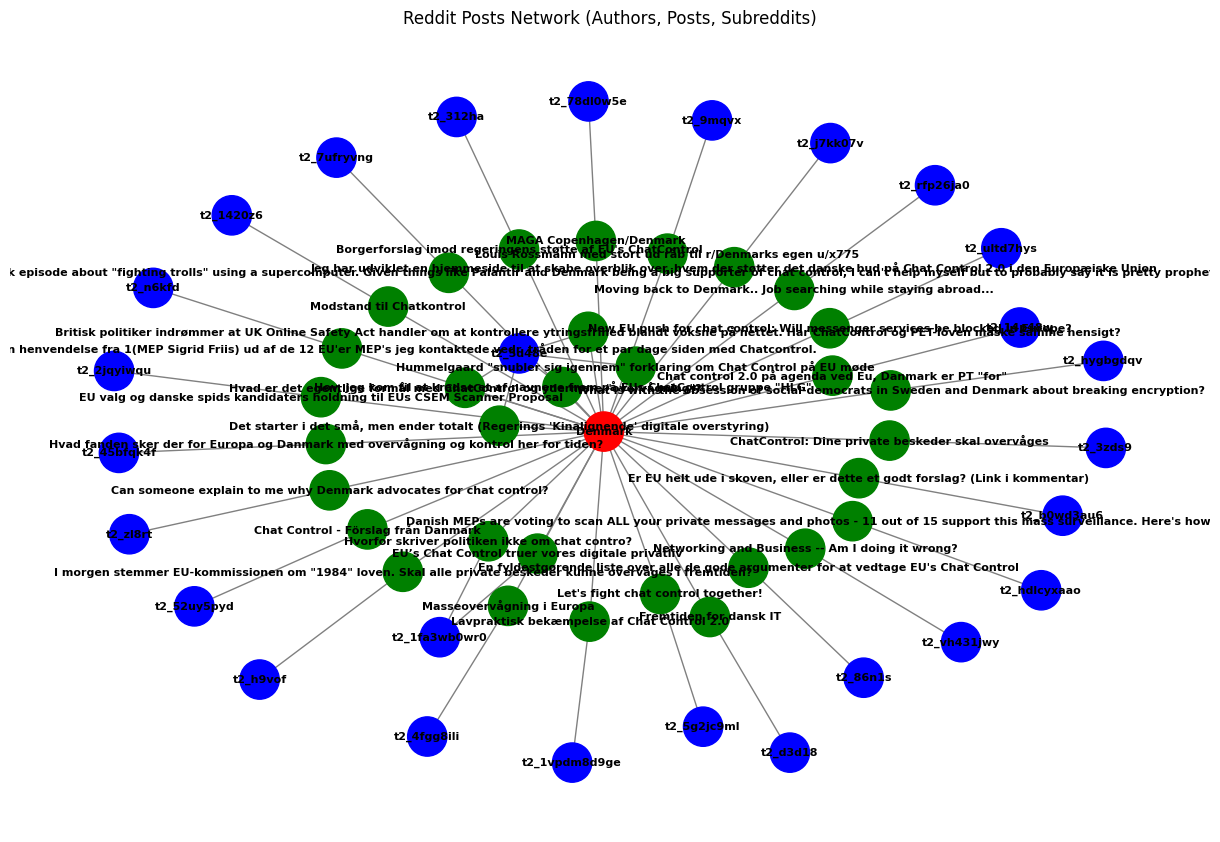

In [9]:
# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    author = post["data"]["author_fullname"]
    title = post["data"]["title"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes
    G.add_node(subreddit, type="subreddit")
    G.add_node(author, type="user")
    G.add_node(title, type="post")

    # Add edges
    G.add_edge(author, title)      # author wrote post
    G.add_edge(title, subreddit)   # post belongs to subreddit

# Draw network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "user":
        colors.append("blue")
    else:
        colors.append("green")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=800,
    font_size=8,
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Authors, Posts, Subreddits)")
plt.show()


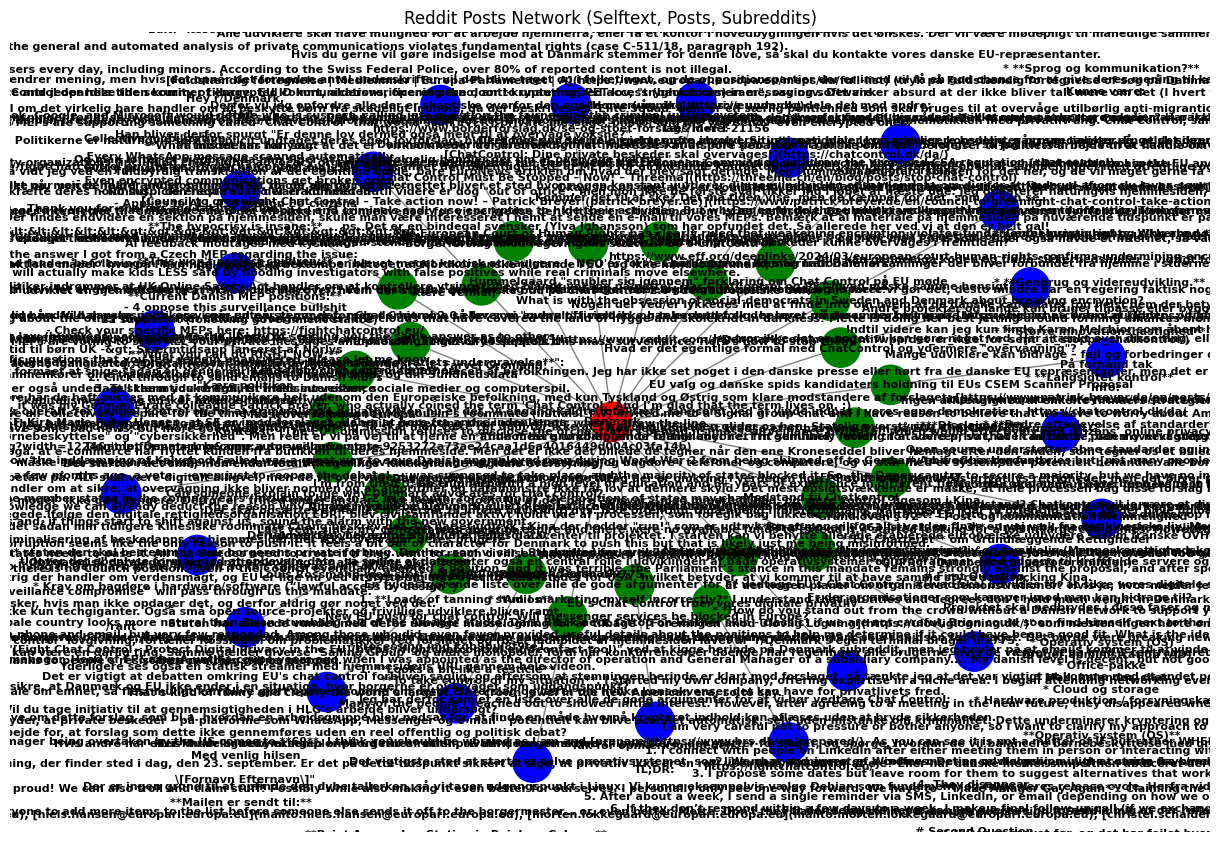

In [14]:
# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    selftext = post["data"]["selftext"]
    title = post["data"]["title"]

    # Skip incomplete entries or selftext with less than 5 characters
    if not (subreddit and selftext and title) or len(selftext) < 5:
        continue

    # Add nodes
    G.add_node(subreddit, type="subreddit")
    G.add_node(selftext, type="selftext")
    G.add_node(title, type="post")

    # Add edges
    G.add_edge(selftext, title)      # selftext belongs to post
    G.add_edge(title, subreddit)      # post belongs to subreddit

# Draw network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "selftext":
        colors.append("blue")
    else:
        colors.append("green")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=800,
    font_size=8,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Reddit Posts Network (Selftext, Posts, Subreddits)")
plt.show()


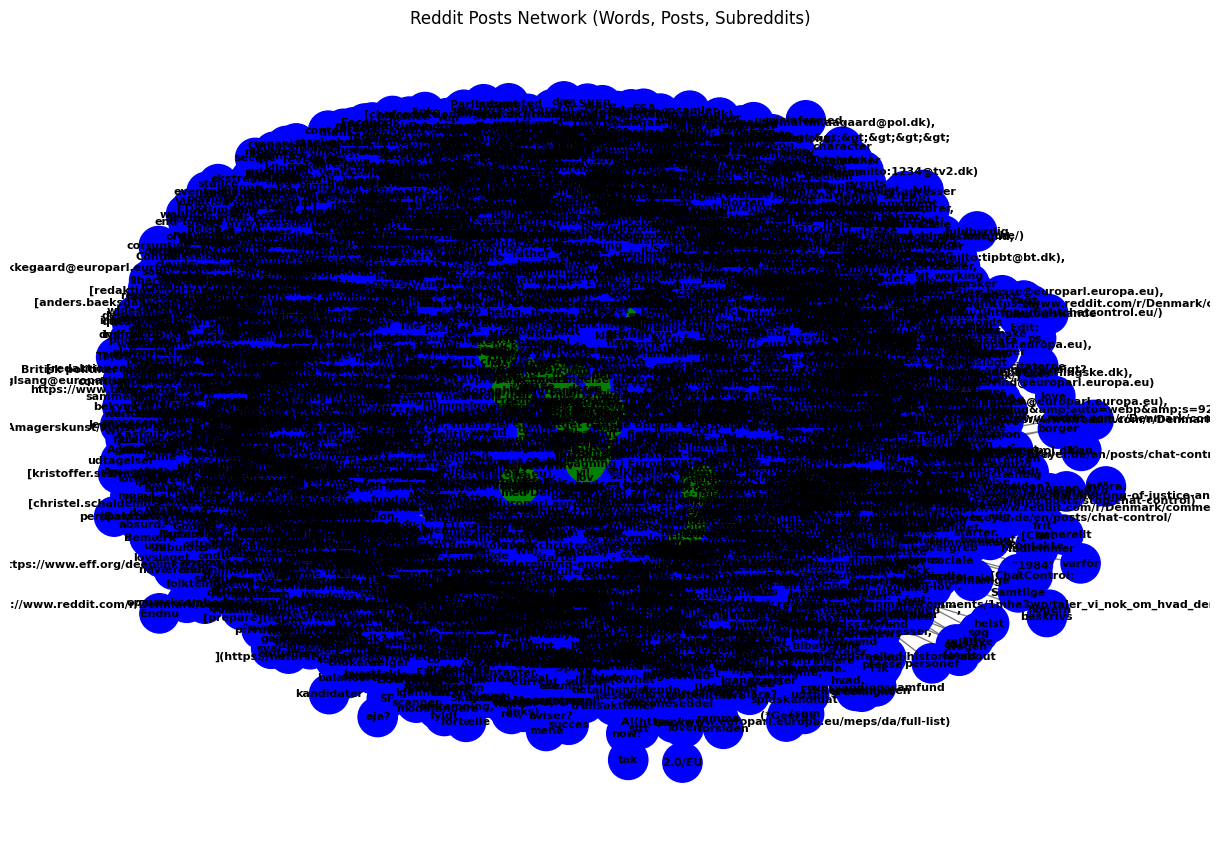

In [17]:

# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    selftext = post["data"]["selftext"]
    title = post["data"]["title"]

    # Skip incomplete entries or selftext with less than 5 characters
    if not (subreddit and selftext and title) or len(selftext) < 5:
        continue

    # Split selftext into words
    words = selftext.split()

    # Add nodes for subreddit and title
    G.add_node(subreddit, type="subreddit")
    G.add_node(title, type="post")

    # Add nodes for each word in selftext
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(word, title)  # word belongs to post

    # Add edge between post and subreddit
    G.add_edge(title, subreddit)  # post belongs to subreddit

# Draw network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "word":
        colors.append("blue")
    else:
        colors.append("green")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=800,
    font_size=8,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Reddit Posts Network (Words, Posts, Subreddits)")
plt.show()


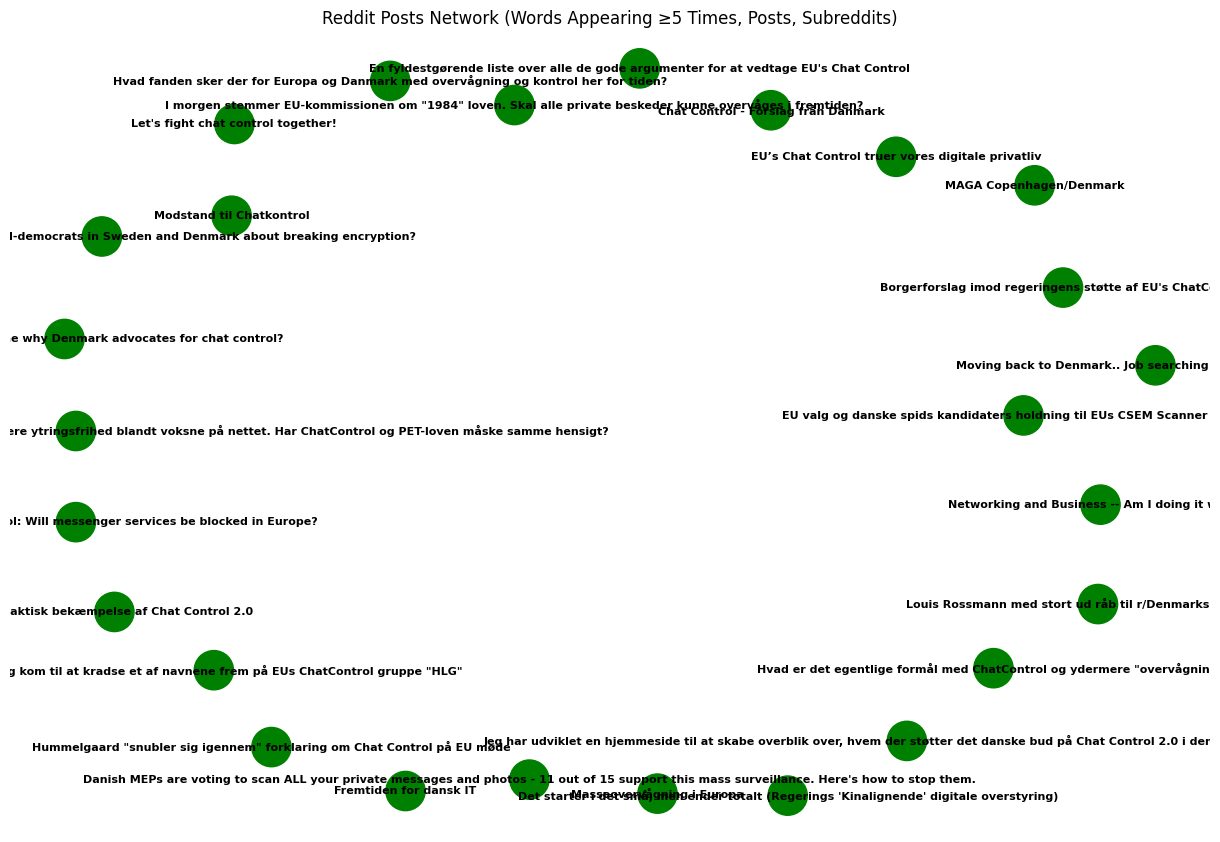

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    selftext = post["data"]["selftext"]
    title = post["data"]["title"]

    # Skip incomplete entries or selftext with less than 5 characters
    if not (subreddit and selftext and title) or len(selftext) < 5:
        continue

    # Split selftext into words
    words = selftext.split()

    # Add nodes for subreddit and title
    G.add_node(subreddit, type="subreddit")
    G.add_node(title, type="post")

    # Add nodes for each word in selftext
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(word, title)  # word belongs to post

    # Add edge between post and subreddit
    G.add_edge(title, subreddit)  # post belongs to subreddit

# Count occurrences of each word
word_counts = defaultdict(int)
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "word":
        word_counts[node] += 1

# Remove word nodes that appear fewer than 5 times
words_to_remove = [word for word, count in word_counts.items() if count < 2]
G.remove_nodes_from(words_to_remove)

# Draw network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "word":
        colors.append("blue")
    else:
        colors.append("green")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=800,
    font_size=8,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Reddit Posts Network (Words Appearing ≥5 Times, Posts, Subreddits)")
plt.show()


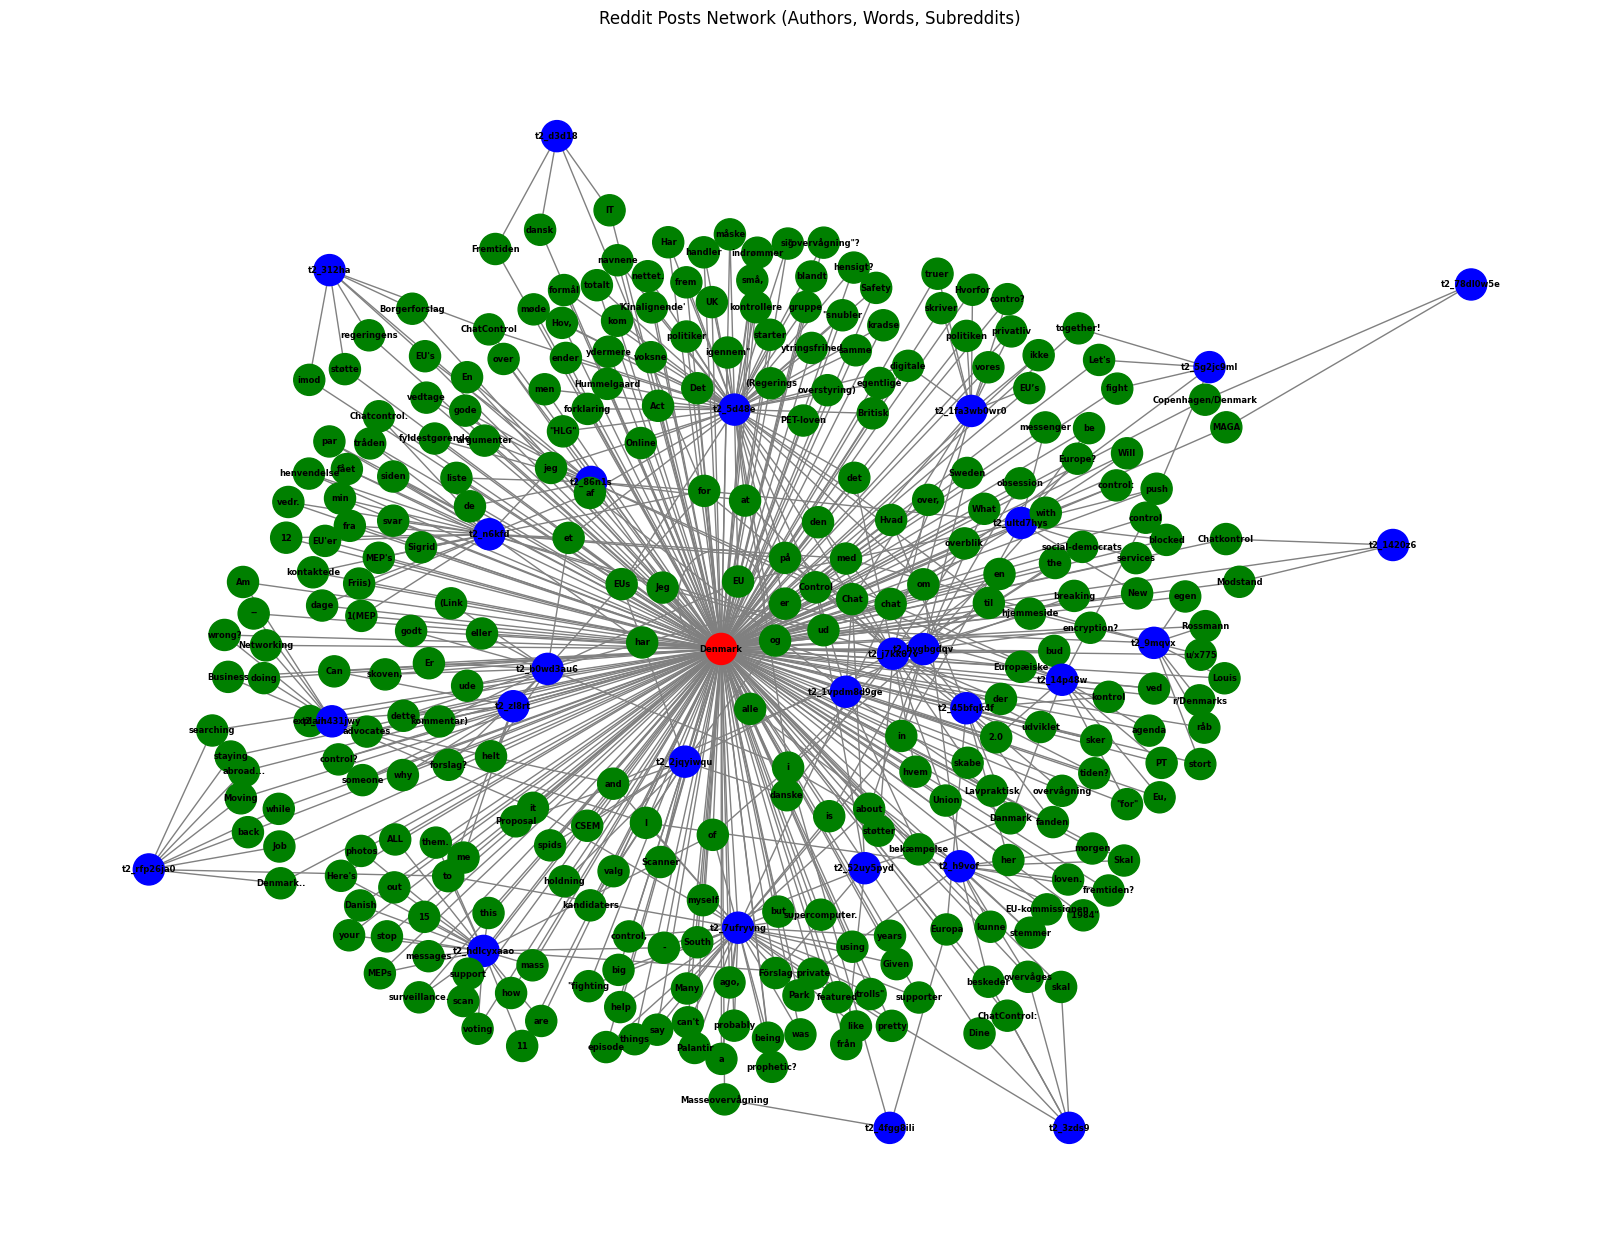

In [21]:

# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    author = post["data"]["author_fullname"]
    title = post["data"]["title"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes for subreddit and author
    G.add_node(subreddit, type="subreddit")
    G.add_node(author, type="user")

    # Split title into words and add each as a node
    words = title.split()  # Split by whitespace
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(author, word)  # author wrote word
        G.add_edge(word, subreddit)  # word belongs to subreddit

# Draw network
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "user":
        colors.append("blue")
    else:
        colors.append("green")  # words

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=500,  # Smaller nodes for words
    font_size=6,    # Smaller font for words
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Authors, Words, Subreddits)")
plt.show()


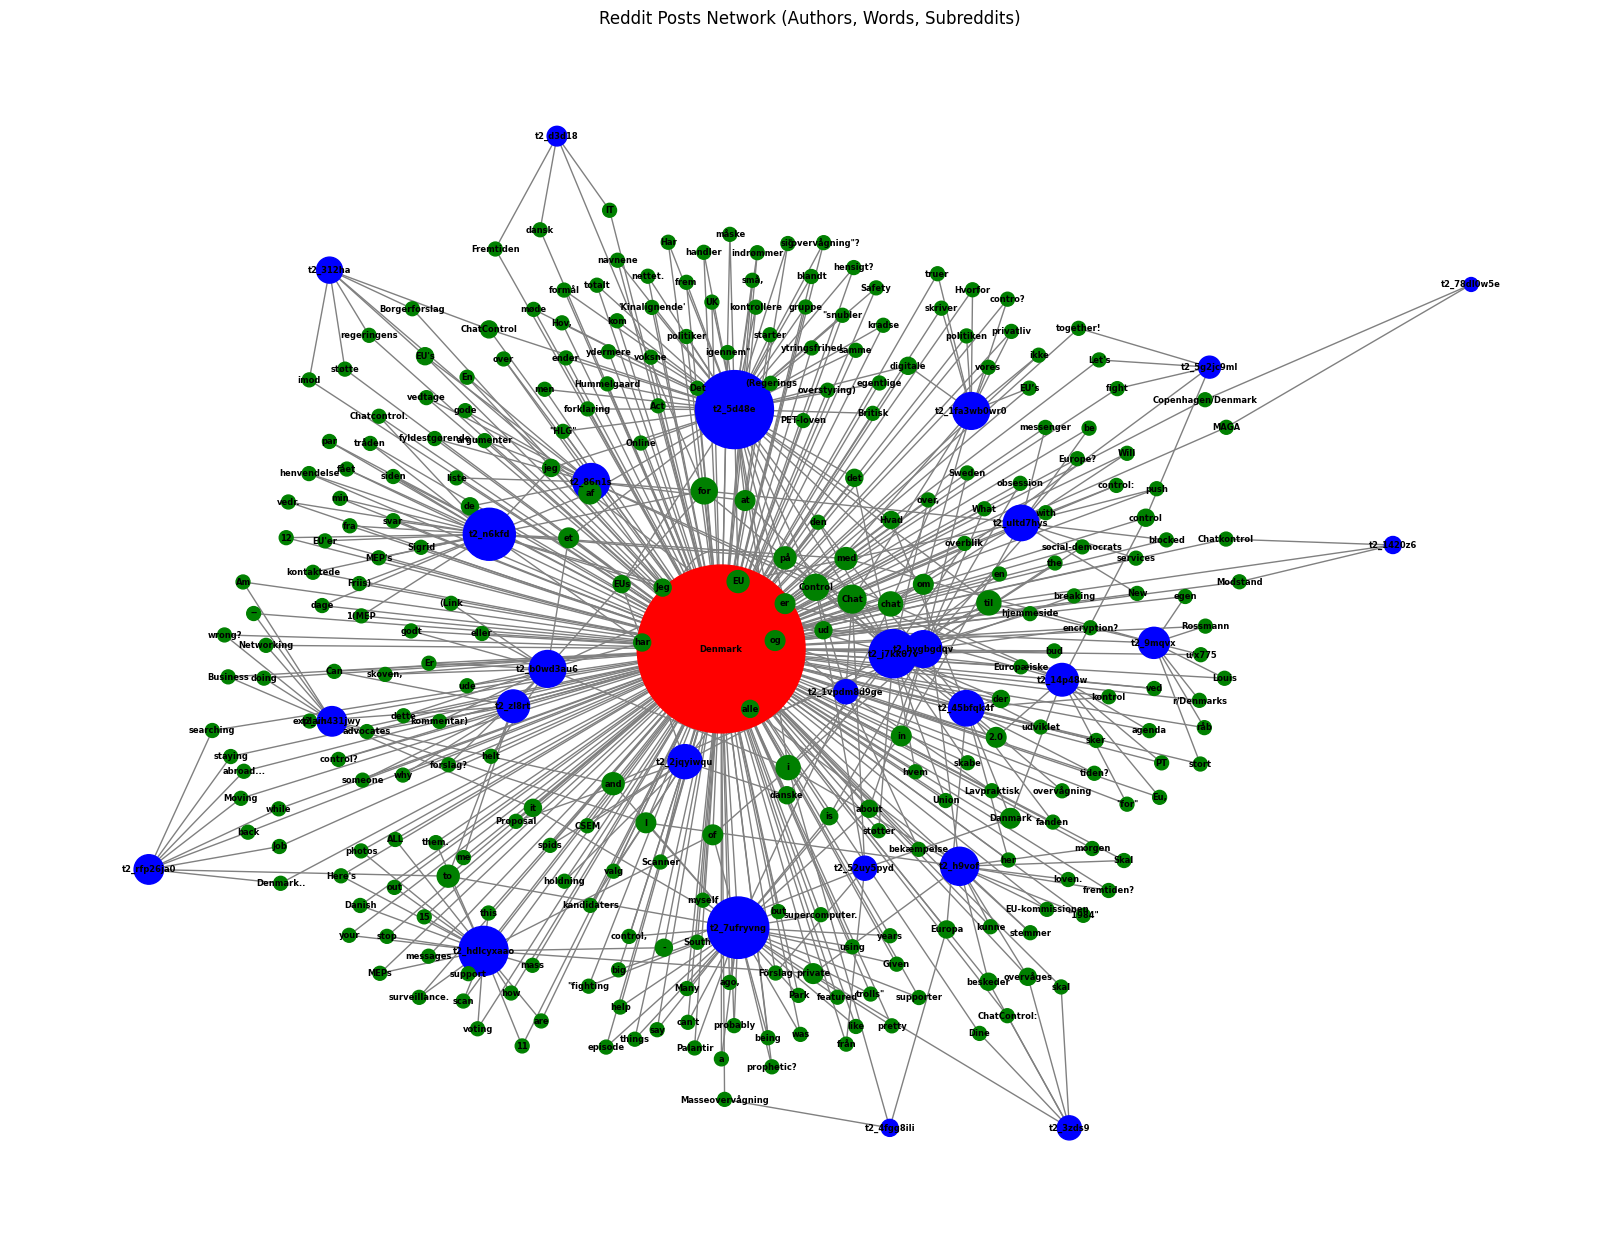

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    author = post["data"]["author_fullname"]
    title = post["data"]["title"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes for subreddit and author
    G.add_node(subreddit, type="subreddit")
    G.add_node(author, type="user")

    # Split title into words and add each as a node
    words = title.split()  # Split by whitespace
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(author, word)  # author wrote word
        G.add_edge(word, subreddit)  # word belongs to subreddit

# Calculate node sizes based on degree (number of connections)
degrees = dict(G.degree())
node_sizes = [degrees[node] * 50 for node in G.nodes()]  # Scale for visibility

# Draw network
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "user":
        colors.append("blue")
    else:
        colors.append("green")  # words

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=node_sizes,  # Use calculated sizes
    font_size=6,
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Authors, Words, Subreddits)")
plt.show()


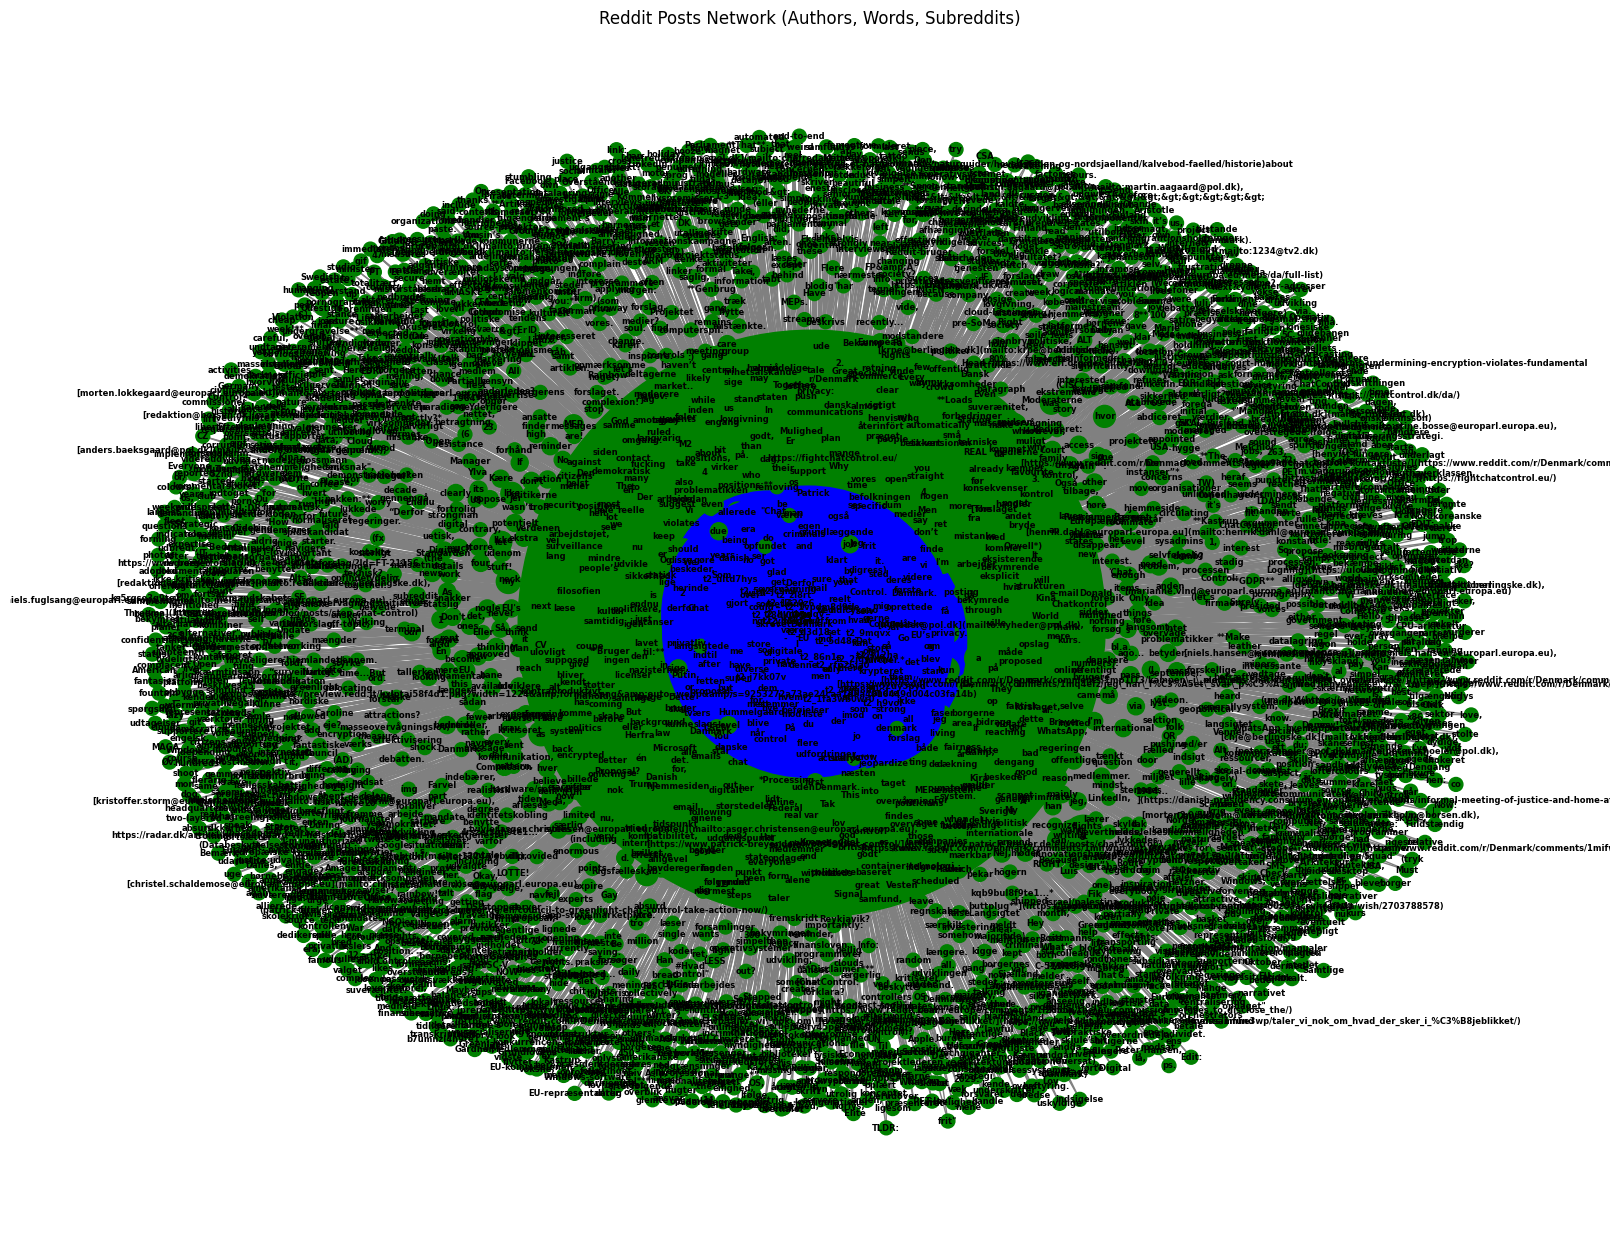

In [23]:

# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    author = post["data"]["author_fullname"]
    title = post["data"]["selftext"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes for subreddit and author
    G.add_node(subreddit, type="subreddit")
    G.add_node(author, type="user")

    # Split title into words and add each as a node
    words = title.split()  # Split by whitespace
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(author, word)  # author wrote word
        G.add_edge(word, subreddit)  # word belongs to subreddit

# Calculate node sizes based on degree (number of connections)
degrees = dict(G.degree())
node_sizes = [degrees[node] * 50 for node in G.nodes()]  # Scale for visibility

# Draw network
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "user":
        colors.append("blue")
    else:
        colors.append("green")  # words

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=node_sizes,  # Use calculated sizes
    font_size=6,
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Authors, Words, Subreddits)")
plt.show()


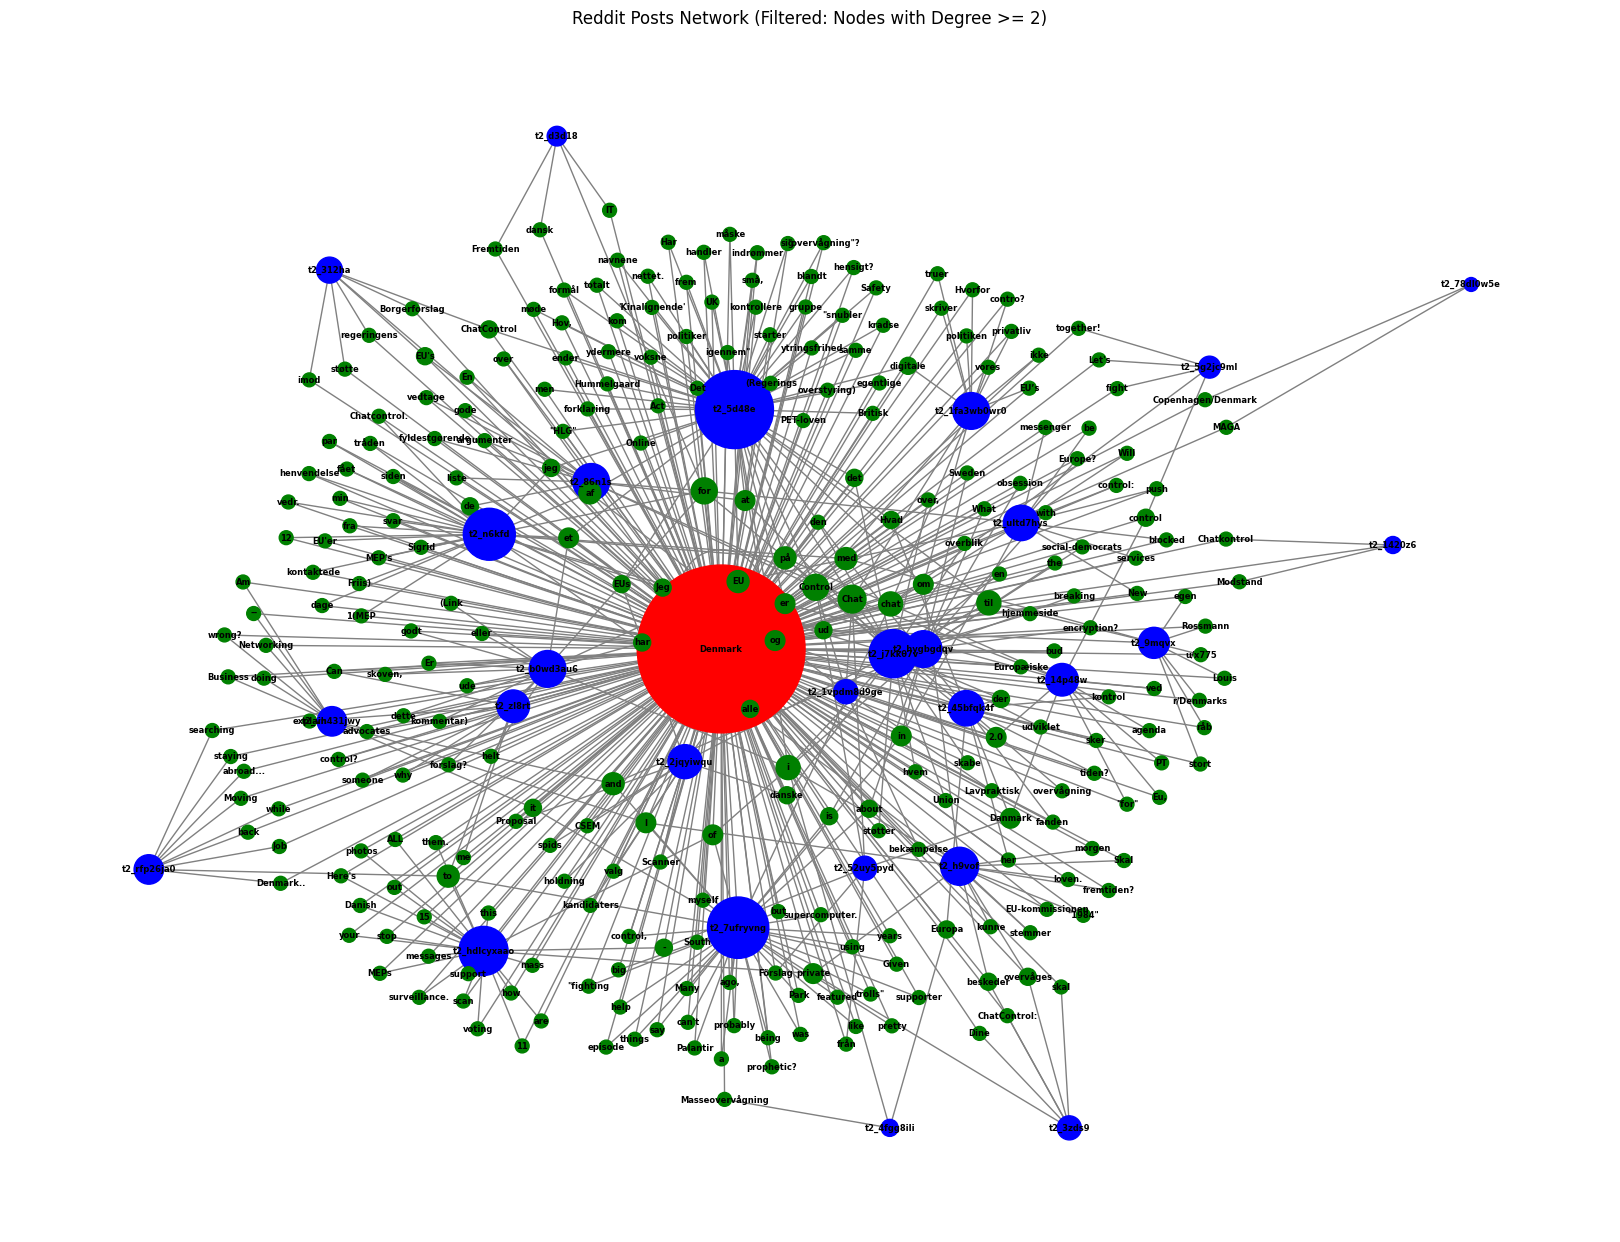

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    author = post["data"]["author_fullname"]
    title = post["data"]["title"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes for subreddit and author
    G.add_node(subreddit, type="subreddit")
    G.add_node(author, type="user")

    # Split title into words and add each as a node
    words = title.split()  # Split by whitespace
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(author, word)  # author wrote word
        G.add_edge(word, subreddit)  # word belongs to subreddit

# Remove nodes with degree less than 5
degrees = dict(G.degree())
nodes_to_remove = [node for node in G.nodes() if degrees[node] < 2]
G.remove_nodes_from(nodes_to_remove)

# Calculate node sizes based on degree (number of connections)
degrees = dict(G.degree())
node_sizes = [degrees[node] * 50 for node in G.nodes()]  # Scale for visibility

# Draw network
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "user":
        colors.append("blue")
    else:
        colors.append("green")  # words

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=node_sizes,  # Use calculated sizes
    font_size=6,
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Filtered: Nodes with Degree >= 2)")
plt.show()


In [61]:
df = pd.read_csv("linkedin-dataset-b0e7b75978a84314d6a665a13808bbff.csv")
df

id            thread_id  \
0    7368749615623426048  7368749615623426048   
1    7368963444248645633  7368963444248645633   
2    7367463609272025088  7367463609272025088   
3    7369720780948934662  7369720780948934662   
4    7368277681798381576  7368277681798381576   
..                   ...                  ...   
177  7366500009980100609  7366500009980100609   
178  7368252349452083201  7368252349452083201   
179  7366424639666900992  7366424639666900992   
180  7367949702455128064  7367949702455128064   
181  7370774172592934912  7370774172592934912   

                                                  body            timestamp  \
0    ChatGPT is set to roll out parental controls f...  2025-09-03 12:33:57   
1    Chat control is a terrible idea, one of the wo...  2025-09-03 12:33:57   
2    🔒 Why I’m against the EU “Chat Control” law\n\...  2025-09-01 12:33:57   
3    working on this was so challenging yet so deli...  2025-09-06 12:34:02   
4    ⚠️ ChatGPT Privacy Tip ⚠️\n\nBy default, ChatG...  2025-09-02 12:34:02   
..                                                 ...                  ...   
177  🤖 Are you ready to take your customer engageme...  2025-09-01 12:38:45   
178  🚨 WhatsApp is secretly gatekeeping your busine...  2025-09-01 12:38:45   
179  Chat App States: Context, Variables, and How S...  2025-09-01 12:38:49   
180  Showcase your products where customers already...  2025-09-01 12:38:49   
181  Most AI agent tools are built wrong.\n\nThey f...  2025-09-08 11:38:49   

     timestamp_collected timestamp_ago is_promoted  \
0    2025-09-08 12:33:57            5d          no   
1    2025-09-08 12:33:57            5d          no   
2    2025-09-08 12:33:57            1w          no   
3    2025-09-08 12:34:02            2d          no   
4    2025-09-08 12:34:02            6d          no   
..                   ...           ...         ...   
177  2025-09-08 12:38:45            1w          no   
178  2025-09-08 12:38:45            1w          no   
179  2025-09-08 12:38:49            1w          no   
180  2025-09-08 12:38:49            1w          no   
181  2025-09-08 12:38:49            1h          no   

                             author          author_name  \
0                   in/asksnehasish      Snehasish Nayak   
1                       in/semancik     Radovan Semančík   
2      in/julie-margareth-toussaint      Julie Toussaint   
3         in/rana-mohamed-872a291a7         Rana Mohamed   
4                 in/angelocarlotto      Angelo Carlotto   
..                              ...                  ...   
177  company/zenthra-ai-us-ca/posts           Zenthra AI   
178         company/softdevza/posts      SoftDevZA Space   
179                    in/ahsanayaz  Muhammad Ahsan Ayaz   
180         company/whatchimp/posts            WhatChimp   
181                   in/cantimagur          Can Timağur   

                                    author_description  ...  reaction_like  \
0    Project Manager @Accenture | Automation Champi...  ...              0   
1        Co-founder and Software Architect at Evolveum  ...             13   
2    Bibliothécaire spécialisée / Librarian special...  ...             12   
3                           Aspiring Software Engineer  ...              0   
4    Full Stack .NET Developer | CSharp | Javascrip...  ...             21   
..                                                 ...  ...            ...   
177                                        4 followers  ...              0   
178                                       50 followers  ...              0   
179  Software Architect @ Scania | Award winning Ed...  ...             11   
180                                      125 followers  ...              1   
181  Founder at Allbound OS | Scale Revenue with AI...  ...             20   

    reaction_empathy reaction_praise reaction_entertainment  \
0                  0               0                      0   
1                  0               0               

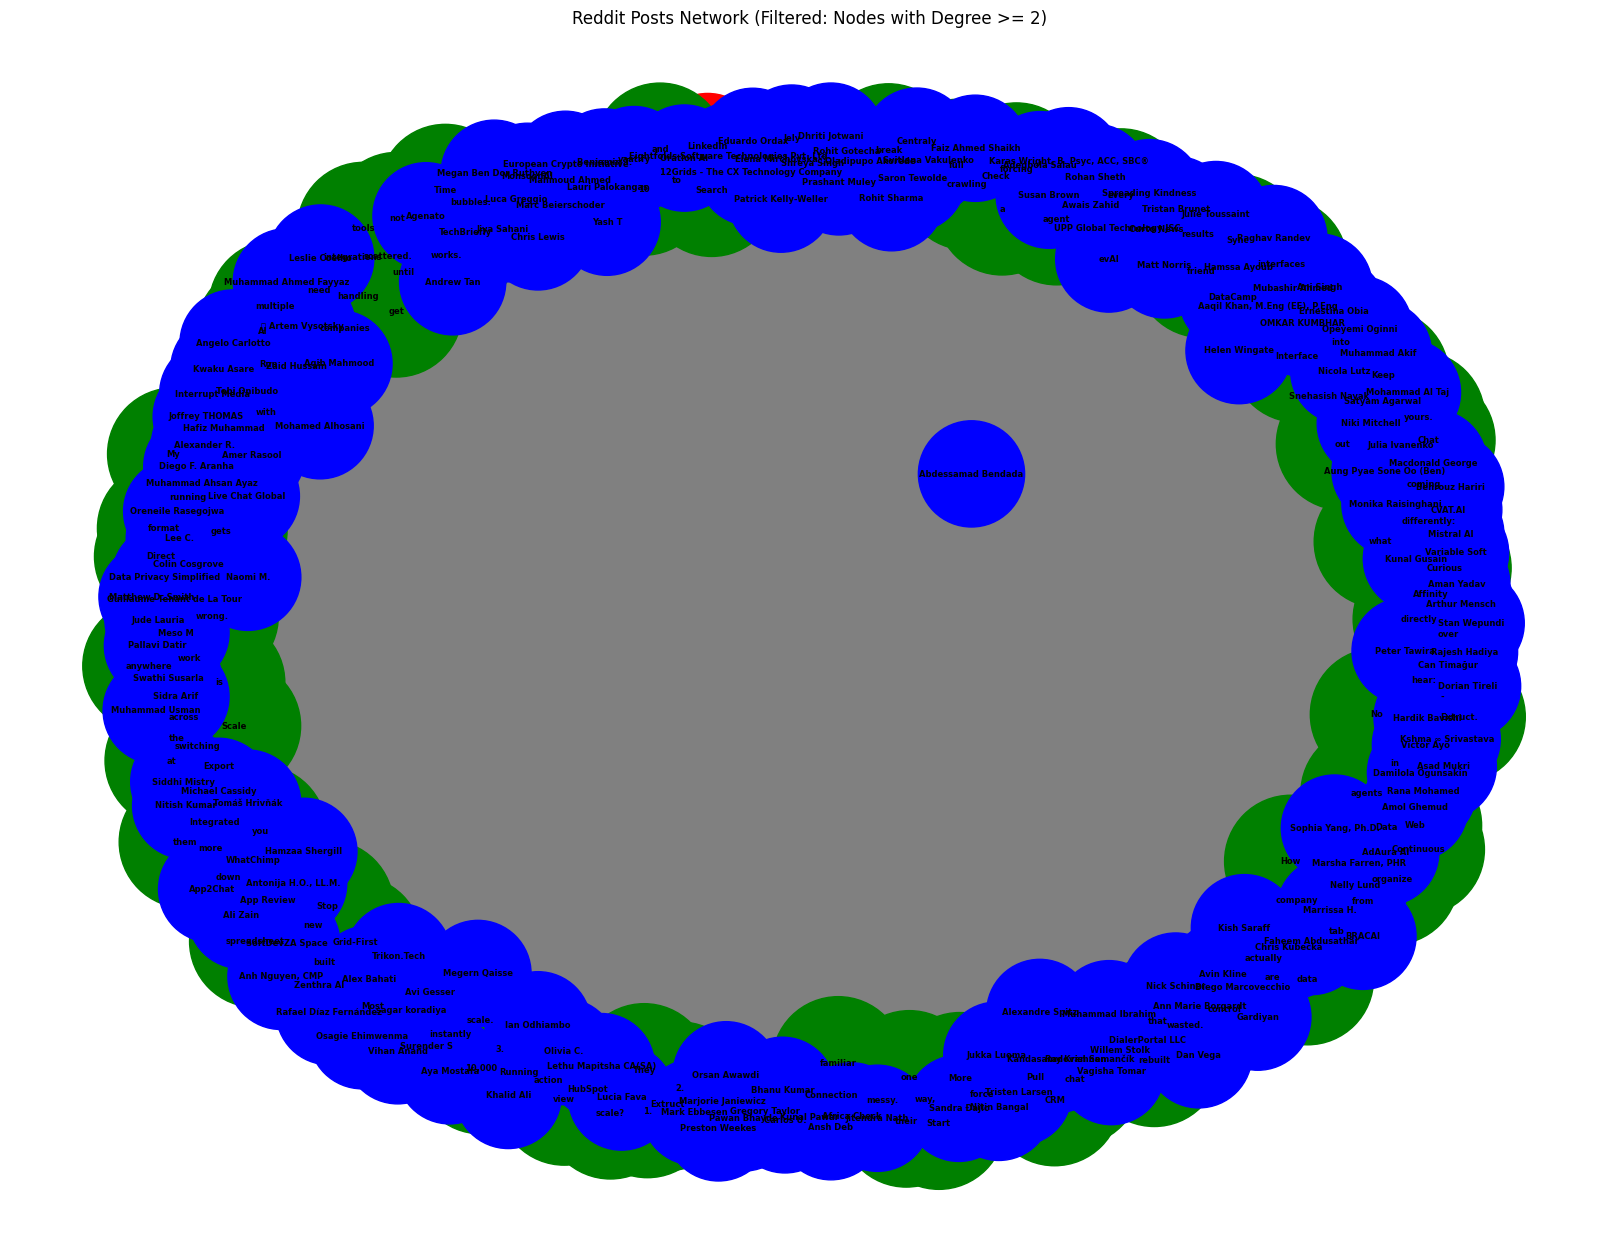

In [69]:
# Create a graph
G = nx.Graph()

# Loop through all rows in the CSV
for _, row in df.iterrows():
    type = "Linkedin"
    author = row["author_name"]
    body = row["body"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes for subreddit and author
    G.add_node(subreddit, type="type")
    G.add_node(author, type="author")

    # Split title into words and add each as a node
    words = title.split()  # Split by whitespace
    for word in words:
        G.add_node(word, type="word")
        G.add_edge(author, word)  # author wrote word
        G.add_edge(word, subreddit)  # word belongs to subreddit

# Remove nodes with degree less than 2
degrees = dict(G.degree())
nodes_to_remove = [
    node for node, attrs in G.nodes(data=True)
    if attrs.get("type") == "word" and degrees[node] < 170
]
G.remove_nodes_from(nodes_to_remove)

# Calculate node sizes based on degree (number of connections)
degrees = dict(G.degree())
node_sizes = [degrees[node] * 50 for node in G.nodes()]  # Scale for visibility

# Draw network
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, seed=42, k=10.0)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "type":
        colors.append("red")
    elif attrs["type"] == "author":
        colors.append("blue")
    else:
        colors.append("green")  # words

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=node_sizes,  # Use calculated sizes
    font_size=6,
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Filtered: Nodes with Degree >= 2)")
plt.show()
